In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Path where csv file is located
data_path = "csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [3]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [4]:
#CHecking shape
data_churn.shape

(7043, 21)

In [5]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [8]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

C:\Users\44779\AppData\Local\Temp\ipykernel_21100\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [9]:
#Trying to convert cell TotalCharges to float since it is as object
data_churn=data_churn.astype({"TotalCharges":float})

ValueError: could not convert string to float: ' ': Error while type casting for column 'TotalCharges'

In [ ]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


In [ ]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

In [ ]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

In [ ]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

In [ ]:
#describing the data
data_churn.describe()

In [28]:
#Find the percentage of churn vs. non-church customers
data_churn.iloc[:,20].head()


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

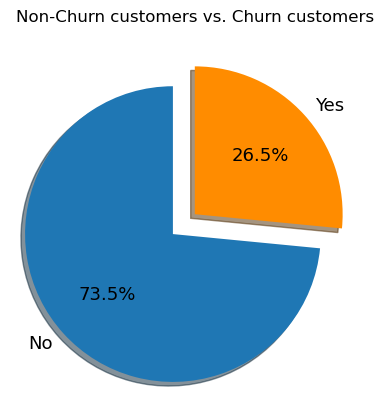

In [72]:
churn= data_churn['Churn'].value_counts()

# Make the pie chart
# Create a pie chart using Matplotlib Pyplot 
plt.pie(churn.values, labels=churn.index, autopct='%1.1f%%', colors= ['#1F77B4', 'darkorange'], startangle=90, shadow=True, explode=(0.2, 0.0), 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title("Non-Churn customers vs. Churn customers")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Churn_pie.png")
plt.show()

In [93]:
#What is the average monthly charge for churn vs non-churn customers
monthly_rate = data_churn.groupby('Churn')['MonthlyCharges'].mean()
monthly_rate

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [100]:
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
correlation = monthly_rate.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: -1.00


In [8]:
data_churn[['MonthlyCharges', 'tenure']].describe().T


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00


In [16]:
# Monthly charges - Mean, Median and Standard dev using the aggregation method
monthlycharge_st = data_churn.groupby('Churn')['MonthlyCharges'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
monthlycharge_st = pd.DataFrame(monthlycharge_st)
monthlycharge_st

,mean,median,var,std,sem
Churn,,,,,
No,61.265124,64.425,966.752767,31.092648,0.432259
Yes,74.441332,79.650,608.414183,24.666053,0.570552


In [68]:
#What is the average tenure for churn vs non-churn customers
tenure_period = data_churn.groupby('Churn')['tenure'].mean()
tenure_period

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [18]:
# Tenure - Mean, Median and Standard dev using the aggregation method
tenure_st = data_churn.groupby('Churn')['tenure'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
tenure_st = pd.DataFrame(tenure_st)
tenure_st

,mean,median,var,std,sem
Churn,,,,,
No,37.569965,38.0,581.474226,24.113777,0.335237
Yes,17.979133,10.0,381.464768,19.531123,0.451775


In [51]:
#Bin tenure Establish the bins
tenure_bins = [-1, 12, 24, 36, 48, 60, 72, 120]
labels = ["0-12m", "12-24m", "24-36m", "36-48m", "48-60m", "60-72m", ">72m" ]

tenure_df = data_churn.copy()
# Use `pd.cut` on the data churn dataframe to categorize tenure on the bins.
tenure_df["Tenure"] = pd.cut(data_churn["tenure"], tenure_bins, labels =labels)

# Convert Tenure to a string
tenure_df["Tenure"]  = tenure_df["Tenure"].astype(str)
tenure_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,24-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,12-24m
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,60-72m
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12m
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0-12m


In [53]:
#Group by Tenure bins
Tenure_bins_summary = pd.DataFrame(tenure_df.groupby('Tenure')['Churn'].value_counts())
Tenure_bins_summary

count
Tenure Churn       
0-12m  No      1149
       Yes     1037
12-24m No       730
       Yes      294
24-36m No       652
       Yes      180
36-48m No       617
       Yes      145
48-60m No       712
       Yes      120
60-72m No      1314
       Yes       93

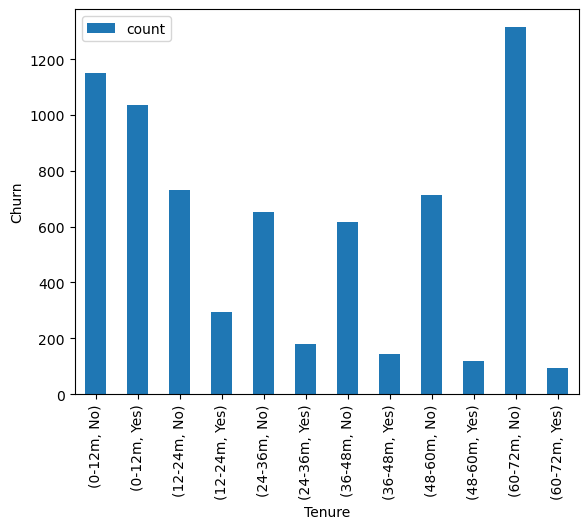

In [65]:
#Stack column chart to show 
# Set 'Category' as index for better plotting
# Create a bar plot using Pandas
Tenure_bins_summary.plot(kind='bar', stacked=True, figsize=(6.5, 5), color= '#1F77B4')

# Customize the plot
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.xticks(rotation=90)  

# Display the plot
plt.show()

In [ ]:
#Outliers and use a box plot 

In [74]:
#run correlation
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
correlation = tenure_period.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 1.00


In [ ]:
#scatter and line on tenure and monthly charges
# Plot tumor volume vs. time point
plt.plot(plot_capomulin["Timepoint"], plot_capomulin["Tumor Volume (mm3)"], color='#1F77B4')

# Add labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.show()

In [ ]:
#Accept or Reject Hypothesis?  


#Which factor is positively correlated to the Churn? 


#How can a Telecom industry retain customers in the future? Business strategies and predictive model based on data